# Task 1: Data Understanding and Preparation


## Task 1.1: Data Understanding:


Explore the dataset with the analytical tools studied and write a concise “data understanding” report describing data semantics, assessing data quality, the distribution of the variables and the pairwise correlations.

#### Task 1.1.0 Load the 'customer_supermarket' dataset.

1.   Seperate column by 'Tab',
2.   Indicate first column as index,
3.   Identify ',' as decimal point,
4.   parse the variable 'BasketDate' into datetime type

In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from datetime import datetime
import zipfile

zf = zipfile.ZipFile("/content/drive/My Drive/DataMing/customer_supermarket.csv.zip") 
df = pd.read_csv(zf.open('customer_supermarket.csv'), sep='\t', index_col=0, decimal=',', parse_dates=['BasketDate'])

### Task 1.1.1 Data semantics


In [4]:
df.head()

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


In [5]:
df.tail()

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
541905,581587,2011-09-12 12:50:00,2.10,12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
541906,581587,2011-09-12 12:50:00,4.15,12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
541907,581587,2011-09-12 12:50:00,4.15,12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
541908,581587,2011-09-12 12:50:00,4.95,12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3
541909,581587,2011-09-12 12:50:00,18.00,12680.0,France,POST,POSTAGE,1


In [6]:
df.dtypes

BasketID                   object
BasketDate         datetime64[ns]
Sale                      float64
CustomerID                 object
CustomerCountry            object
ProdID                     object
ProdDescr                  object
Qta                         int64
dtype: object

* BasketID : The identification number of a market transaction.
* BasketDate : The date when the transaction made.
* Sale : The price per unit of the product.
* CustomerID : The identification number of a customer.
* CustomerCountry : The nationality of the customer.
* ProdID : The identification number of a product.
* ProdDescr : The description of a product.
* Qta : The quantity for a product of a transaction.


### Task 1.1.2 Distribution of the variables and statistics


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         471910 non-null  object        
 1   BasketDate       471910 non-null  datetime64[ns]
 2   Sale             471910 non-null  float64       
 3   CustomerID       406830 non-null  object        
 4   CustomerCountry  471910 non-null  object        
 5   ProdID           471910 non-null  object        
 6   ProdDescr        471157 non-null  object        
 7   Qta              471910 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 32.4+ MB


In [8]:
print("The number of Distinct Values in BasketID: ", len(df.BasketID.unique()), "\t First five vales: ", df.BasketID.unique()[:5])
print("The number of Distinct Values in BasketDate: ", len(df.BasketDate.unique()), "\t First two vales: ", df.BasketDate.unique()[:2])
print("The number of Distinct Values in CustomerID: ", len(df.CustomerID.unique()), "\t First five vales: ", df.CustomerID.unique()[:5])
print("The number of Distinct Values in CustomerCountry: ", len(df.CustomerCountry.unique()), "\t First five vales: ", df.CustomerCountry.unique()[:5])
print("The number of Distinct Values in ProdID: ", len(df.ProdID.unique()), "\t First five vales: ", df.ProdID.unique()[:5])
print("The number of Distinct Values in ProdDescr: ", len(df.ProdDescr.unique()), "\t First two vales: ", df.ProdDescr.unique()[:2])

The number of Distinct Values in BasketID:  24627 	 First five vales:  ['536365' '536366' '536368' '536367' '536369']
The number of Distinct Values in BasketDate:  22428 	 First two vales:  ['2010-01-12T08:26:00.000000000' '2010-01-12T08:28:00.000000000']
The number of Distinct Values in CustomerID:  4373 	 First five vales:  ['17850.0' '13047.0' '12583.0' '13748.0' '15100.0']
The number of Distinct Values in CustomerCountry:  38 	 First five vales:  ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany']
The number of Distinct Values in ProdID:  3953 	 First five vales:  ['85123A' '71053' '84406B' '84029G' '84029E']
The number of Distinct Values in ProdDescr:  4098 	 First two vales:  ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN']


In [9]:
df.describe()

,Sale,Qta
count,471910.000000,471910.000000
mean,4.030945,10.716533
std,83.769380,231.355136
min,-11062.060000,-80995.000000
25%,1.250000,1.000000
50%,2.080000,4.000000
75%,3.750000,12.000000
max,38970.000000,80995.000000


* BasketID : Discrete variable of type 'str'.       
* BasketDate : Discrete variable of type 'datetime64[ns]'.
* Sale : Continuous variable of type 'float64'.       
* CustomerID : Discrete variable of type 'str'.         
* CustomerCountry : Discrete variable of type 'str'.       
* ProdID : Discrete variable of type 'str'.         
* ProdDescr : Discrete variable of type 'str'.         
* Qta : Continuous variable of type 'int64'. 

In [10]:
df.corr()

,Sale,Qta
Sale,1.000000,-0.001247
Qta,-0.001247,1.000000


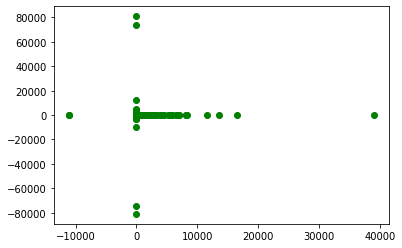

In [11]:
plt.scatter(df['Sale'], df['Qta'], color='g')

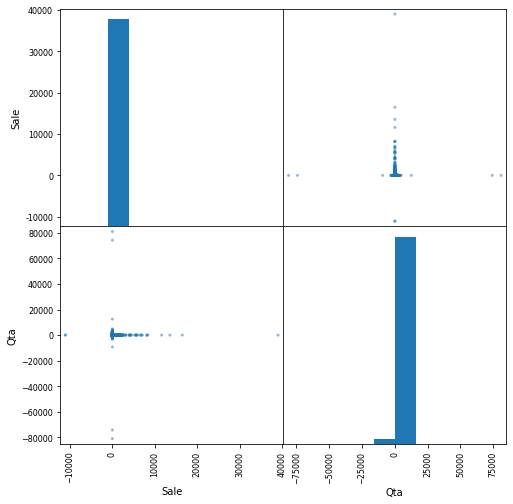

In [12]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(8, 8))
plt.show()

Text(0.5, 1.0, 'Qta Histogram')

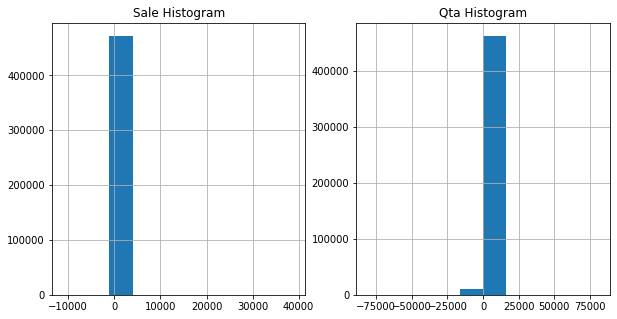

In [13]:
# Set up a grid of plots
fig = plt.figure(figsize=(10, 5)) 
fig_dims = (1, 2)

# Plot Sale counts
plt.subplot2grid(fig_dims, (0, 0))
df['Sale'].hist()
plt.title('Sale Histogram')

# Plot Qta counts
plt.subplot2grid(fig_dims, (0, 1))
df['Qta'].hist()
plt.title('Qta Histogram')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


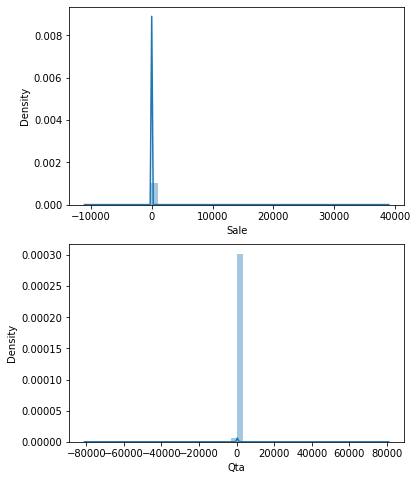

In [14]:
f,ax=plt.subplots(figsize=(6,8))
plt.subplot(2,1,1);sns.distplot(df.Sale,label='Sale')
plt.subplot(2,1,2);sns.distplot(df.Qta,label='Qta')
plt.show()

### Task 1.1.3 Assessing data quality (missing values, outliers)

*From the distribution of the varibles and statistics described above, we noticed that:*
* *The variable 'CustomerID' and  'ProdDescr' have missing values,*
* *The variable 'Sale' and 'Qta' have explicit outliers which values less or equal to zero.*

#### Removing Duplicates.

In [15]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466678 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         466678 non-null  object        
 1   BasketDate       466678 non-null  datetime64[ns]
 2   Sale             466678 non-null  float64       
 3   CustomerID       401605 non-null  object        
 4   CustomerCountry  466678 non-null  object        
 5   ProdID           466678 non-null  object        
 6   ProdDescr        465925 non-null  object        
 7   Qta              466678 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 32.0+ MB


#### Handling missing values.

1. *Dropping the records directly which has variable 'customerID' as 'Nan' since it's insignificant to make up a new 'customerID':*

In [16]:
df = df.dropna(subset=['CustomerID'])

2. *Dealing with the missing values in variable 'ProdDescr':*

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401605 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         401605 non-null  object        
 1   BasketDate       401605 non-null  datetime64[ns]
 2   Sale             401605 non-null  float64       
 3   CustomerID       401605 non-null  object        
 4   CustomerCountry  401605 non-null  object        
 5   ProdID           401605 non-null  object        
 6   ProdDescr        401605 non-null  object        
 7   Qta              401605 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.6+ MB


*We noticed that there is no missing values anymore, it seems like the missing values in variable 'ProdDescr' are related to the missing values in variable 'CustomerID' somehow.*

3. *Dealing with the missing values in variable 'Sale':*

In [18]:
df['Sale'].describe()

count    401605.000000
mean          3.474100
std          69.763952
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: Sale, dtype: float64

*We noticed that there is some values for 'Sale' equal to zero As shown below, it is possible that the zero values present are missing values, so we fill with the mean value of the group of records which have the same 'ProdID'*


In [19]:
df[(df["Sale"]==0)].ProdDescr.unique()

array(['ROUND CAKE TIN VINTAGE GREEN', 'ADVENT CALENDAR GINGHAM SACK',
       'REGENCY CAKESTAND 3 TIER', 'PAPER BUNTING RETROSPOT',
       'PLASTERS IN TIN SKULLS', 'ORGANISER WOOD ANTIQUE WHITE ',
       'FAIRY CAKES NOTEBOOK A6 SIZE',
       'CERAMIC BOWL WITH LOVE HEART DESIGN',
       'MINI CAKE STAND  HANGING STRAWBERY',
       'HEART GARLAND RUSTIC PADDED',
       'CHILDS BREAKFAST SET CIRCUS PARADE', 'PARTY BUNTING',
       'SET OF 6 SOLDIER SKITTLES', ' OVAL WALL MIRROR DIAMANTE ',
       'JAM MAKING SET WITH JARS', 'Manual', 'SET OF 6 NATIVITY MAGNETS ',
       'SET OF 2 CERAMIC PAINTED HEARTS ',
       'SET OF 2 CERAMIC CHRISTMAS REINDEER', '36 FOIL STAR CAKE CASES ',
       'POLKADOT RAIN HAT ', 'PADS TO MATCH ALL CUSHIONS',
       'GLASS CLOCHE SMALL', 'PASTEL COLOUR HONEYCOMB FAN',
       'BISCUIT TIN VINTAGE CHRISTMAS', 'CHRISTMAS PUDDING TRINKET POT ',
       'JUMBO BAG SPACEBOY DESIGN', 'RED KITCHEN SCALES',
       "CHILDREN'S APRON DOLLY GIRL ", 'MINI LIGHTS WOODLAND 

In [20]:
df['Sale'] = df.groupby(['ProdID'])['Sale'].transform(lambda x: x.replace(to_replace=0, method='ffill', value = pd.np.nan))
df['Sale'] = df.groupby(['ProdID'])['Sale'].transform(lambda x: x.fillna(x.mean()))
df['Sale'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


count    401605.000000
mean          3.479528
std          69.776257
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: Sale, dtype: float64

In [21]:
df.to_csv(r'/content/drive/My Drive/DataMing/No_missing_values.csv', header=True)

#### Handling outliers.

1. *Dealing with the outliers in variable 'Sale':*


In [22]:
df['Sale'].describe()

count    401605.000000
mean          3.479528
std          69.776257
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: Sale, dtype: float64

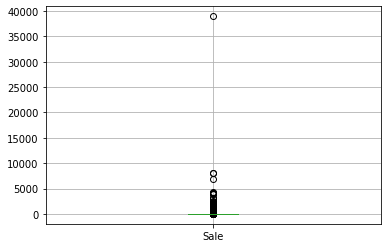

In [23]:
boxplot = df.boxplot(column=['Sale'])

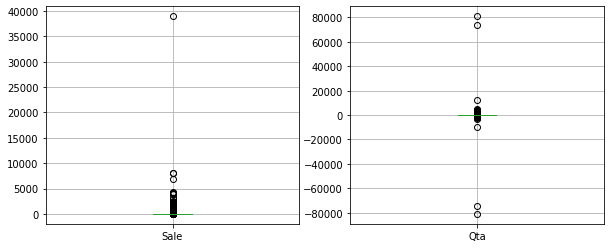

In [24]:
fig = plt.figure(figsize=(10, 4))
plt.subplot(1,2,1);boxplot1 = df.boxplot(column=['Sale'])
plt.subplot(1,2,2);boxplot2 = df.boxplot(column=['Qta'])
ax.set_ylim([-10,10])
plt.show()

*From the boxplot above we noticed that there are a mount of records
having quite different 'Sale' values compared to the majority
of the records in the dataset. These
records are valid from the business point
of view as they are genuine transaction
records; however, they are outliers from the
data analysis point of view. Therefore, these
records should be isolated from the
majority and treated separately.*

*Consider the scale of the outliers for 'Sale', here we only remove the mild outliers which beyond an inner fence on either side.*

*A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:*
1. *lower inner fence: Q1 - 1.5*IQ*
2. *upper inner fence: Q3 + 1.5*IQ*
3. *lower outer fence: Q1 - 3*IQ*
4. *upper outer fence: Q3 + 3*IQ*

In [25]:
Q1 = df['Sale'].quantile(0.25)
Q3 = df['Sale'].quantile(0.75)
IQR = Q3 - Q1
df = df[((df.Sale > Q1 - 3*IQR))&(df.Sale < Q3 + 3*IQR)]

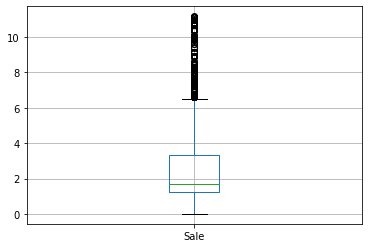

In [26]:
boxplot = df.boxplot(column=['Sale'])

2. *Dealing with the outliers in variable 'Qta':*

In [27]:
df['Qta'].describe()

count    391321.000000
mean         12.447423
std         253.543585
min      -80995.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Qta, dtype: float64

*The same strategy as we applied to the outliers in 'Sale', here we only remove the mild outliers which beyond an inner fence on either side.*



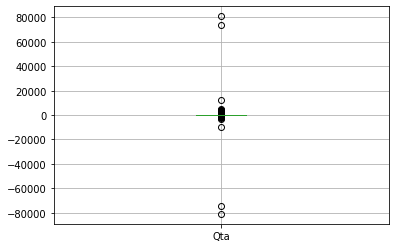

In [28]:
boxplot = df.boxplot(column=['Qta'])

In [29]:
Q1 = df['Qta'].quantile(0.25)
Q3 = df['Qta'].quantile(0.75)
IQR = Q3 - Q1
df = df[((df.Qta > Q1-3*IQR))&(df.Qta < Q3+3*IQR)]

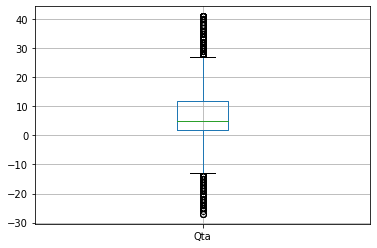

In [30]:
boxplot = df.boxplot(column=['Qta'])

In [31]:
df['Qta'].describe()

count    372239.000000
mean          7.510204
std           7.823722
min         -27.000000
25%           2.000000
50%           5.000000
75%          12.000000
max          41.000000
Name: Qta, dtype: float64

*From the observation shown as belown, we noticed that there is a few negative values in 'Qta' that their 'BasketID' strating with 'C', vice versa. It is possible indicate for the cancelled transcations. Therefore, we treat them as normal records for further use.*

The number of records that 'BasketID' starting with 'C' :  7618
The number of records that 'Qta' has negative values :  7618



Text(0, 0.5, 'Qta')

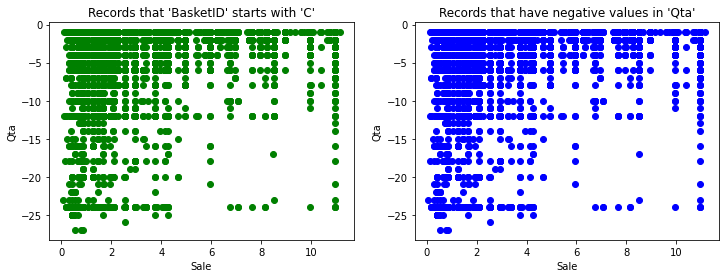

In [32]:
BasketID_C = df[['BasketID', 'Qta', 'Sale']]
BasketID_C = BasketID_C[BasketID_C["BasketID"].str.match('C')]
Neg_qta = df[['BasketID', 'Qta', 'Sale']]
Neg_qta= Neg_qta[Neg_qta.Qta<0]
print('The number of records that \'BasketID\' starting with \'C\' : ',len(BasketID_C[BasketID_C["BasketID"].str.match('C')]))
print('The number of records that \'Qta\' has negative values : ',len(Neg_qta[Neg_qta.Qta<0]))
print()

# Set up a grid of plots:
fig = plt.figure(figsize=(12, 4)) 
fig_dims = (1, 2)

# Scatter plot 
plt.subplot2grid(fig_dims, (0, 0))
plt.scatter(BasketID_C['Sale'], BasketID_C['Qta'], color='g')
plt.title("Records that 'BasketID' starts with 'C'")
plt.xlabel('Sale')
plt.ylabel('Qta')

plt.subplot2grid(fig_dims, (0, 1))
plt.scatter(Neg_qta['Sale'], Neg_qta['Qta'], color='b')
plt.title("Records that have negative values in 'Qta'")
plt.xlabel('Sale')
plt.ylabel('Qta')

*Distribution of  the variables and statistics after removing the mild outliers:*

In [33]:
df.describe()

,Sale,Qta
count,372239.000000,372239.000000
mean,2.636074,7.510204
std,2.241939,7.823722
min,0.001000,-27.000000
25%,1.250000,2.000000
50%,1.950000,5.000000
75%,3.750000,12.000000
max,11.170000,41.000000


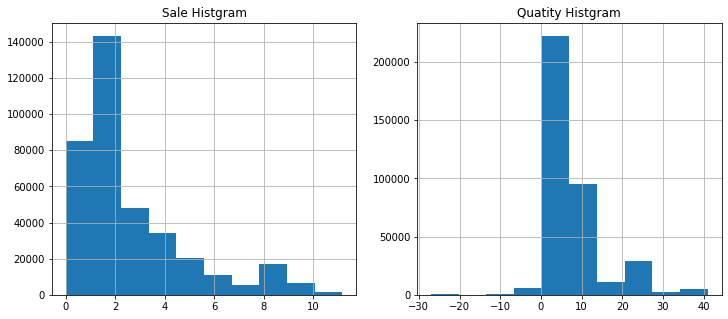

In [34]:
fig = plt.figure(figsize=(12, 5)) 
fig_dims = (1, 2)

# After handling missing values
plt.subplot2grid(fig_dims, (0, 0))
df['Sale'].hist()
plt.title("Sale Histgram")

plt.subplot2grid(fig_dims, (0, 1))
df['Qta'].hist()
plt.title("Quatity Histgram")

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


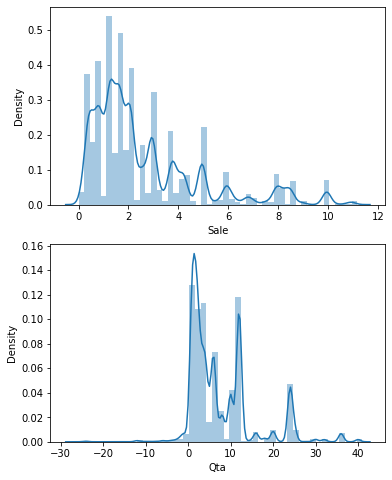

In [35]:
f,ax=plt.subplots(figsize=(6,8))
plt.subplot(2,1,1);sns.distplot(df.Sale,label='Sale')
plt.subplot(2,1,2);sns.distplot(df.Qta,label='Qta')
plt.show()

*From the figures shown above, we noticed that the distribution of 'Sale' is right skewed, 'Qta' is not skewed.*

3. Dealing with  the outliers in variable 'CustomerCountry'.

In [36]:
df.CustomerCountry.describe()

count             372239
unique                37
top       United Kingdom
freq              334226
Name: CustomerCountry, dtype: object

Number of customs with Nationality is UK :  334226
Number of customs with Nationality is not UK :  38013



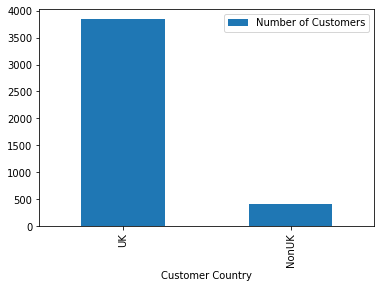

In [37]:
UK = df[df['CustomerCountry']== 'United Kingdom']
nonUK = df[df['CustomerCountry'] != 'United Kingdom']
UK_vs_non_UK = pd.DataFrame({"Customer Country":["UK", "NonUK"], "Number of Customers":[UK.CustomerID.unique().size,nonUK.CustomerID.unique().size]})
print('Number of customs with Nationality is UK : ', len(UK))
print('Number of customs with Nationality is not UK : ', len(nonUK))
print()
UK_vs_non_UK.plot(x ='Customer Country', y='Number of Customers', kind = 'bar')

*Consider the Non-UK customers is the minority, we decide to just drop the Non-UK records in the dataset, since the remian records are all of nationality of UK, we can simply drop the variable 'CustomerCounty'.* 

In [38]:
df = df[df['CustomerCountry'] == 'United Kingdom']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334226 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         334226 non-null  object        
 1   BasketDate       334226 non-null  datetime64[ns]
 2   Sale             334226 non-null  float64       
 3   CustomerID       334226 non-null  object        
 4   CustomerCountry  334226 non-null  object        
 5   ProdID           334226 non-null  object        
 6   ProdDescr        334226 non-null  object        
 7   Qta              334226 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 22.9+ MB


#### Pairwise correlations.

In [39]:
df.corr()

,Sale,Qta
Sale,1.000000,-0.322573
Qta,-0.322573,1.000000


Text(0, 0.5, 'Qta')

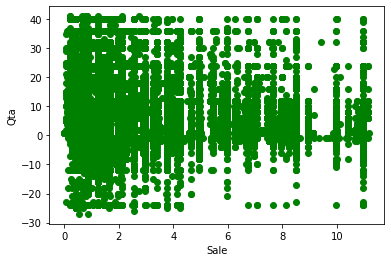

In [40]:
plt.scatter(df['Sale'], df['Qta'], color='g')
plt.xlabel('Sale')
plt.ylabel('Qta')

From the observation shown as above, the variable 'Sale' and 'Qta' are negative weak correlated.

#### Elimination of redundant variables.

In [41]:
df.drop(columns=['CustomerCountry'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334226 entries, 0 to 541893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BasketID    334226 non-null  object        
 1   BasketDate  334226 non-null  datetime64[ns]
 2   Sale        334226 non-null  float64       
 3   CustomerID  334226 non-null  object        
 4   ProdID      334226 non-null  object        
 5   ProdDescr   334226 non-null  object        
 6   Qta         334226 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 20.4+ MB


In [42]:
df.to_csv(r'/content/drive/My Drive/DataMing/Basket.csv', header=True)

## Task 1.2: Data Preparation:

Improve the quality of your data and prepare it by extracting new features interesting for describing the customer profile and his purchasing behavior. These indicators have to be extracted for each customer. 

We already handled the missing values and outliers, here we extracting new features for decribing the customer profile and his purchasing behavior.

### Task 1.2.1 Variables transformations and generation

Transform varbiable 'BasketDate' and generate new features 'Date', 'Year' and 'Month'.



In [43]:
df.BasketDate.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  334226
unique                  17107
top       2011-11-14 15:27:00
freq                      513
first     2010-01-12 08:26:00
last      2011-12-10 17:19:00
Name: BasketDate, dtype: object

*From the information we got above, we noticed the dataset are spaned more than one year, in order to better understand and analysis the dataset, we decide to focus on a full year transcations that is from 2010-11-30 to 2011-12-01.*

In [44]:
querySer = (df.loc[:,'BasketDate']<'2011-12-01') & (df.loc[:,'BasketDate'] > '2010-11-30')
df = df.loc[querySer,:]

In [45]:
df.BasketDate.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  312936
unique                  15918
top       2011-11-14 15:27:00
freq                      513
first     2010-12-12 10:11:00
last      2011-11-30 17:42:00
Name: BasketDate, dtype: object

*Transform 'BasketDate' into 'Date', 'Year' and 'Month' for further use.*

In [46]:
# Transform 'BasketDate'.
date_split=df['BasketDate'].astype('str').str.split(' ')
df['Date']=date_split.str[0]
# Add year and month to dictonary.
df['Year']=df.Date.map(lambda x:x.split('-')[0])
df['Month']=df.Date.map(lambda x:x.split('-')[1])
# Parse the variable 'Date' from type 'str' to type 'datetime64[ns]'.
df.loc[:,'Date']=pd.to_datetime(df.loc[:,'Date'], format='%Y-%m-%d', errors='coerce')
# Drop the variable 'BasketDate' since we already transform it into into 'Date', 'Year' and 'Month'.
df.drop(columns=['BasketDate'],inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312936 entries, 25281 to 541893
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BasketID    312936 non-null  object        
 1   Sale        312936 non-null  float64       
 2   CustomerID  312936 non-null  object        
 3   ProdID      312936 non-null  object        
 4   ProdDescr   312936 non-null  object        
 5   Qta         312936 non-null  int64         
 6   Date        312936 non-null  datetime64[ns]
 7   Year        312936 non-null  object        
 8   Month       312936 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 23.9+ MB


In [48]:
print(df.head())
print()
print(df.tail())

      BasketID  Sale CustomerID  ProdID  ... Qta       Date  Year Month
25281   538365  1.65    17243.0   22469  ...   8 2010-12-12  2010    12
25282   538365  4.25    17243.0  84030E  ...   1 2010-12-12  2010    12
25283   538365  4.95    17243.0   22112  ...   3 2010-12-12  2010    12
25284   538365  4.65    17243.0   22835  ...   5 2010-12-12  2010    12
25285   538365  3.75    17243.0  84029E  ...   4 2010-12-12  2010    12

[5 rows x 9 columns]

       BasketID  Sale CustomerID ProdID  ... Qta       Date  Year Month
541889   581585  1.95    15804.0  22466  ...  12 2011-09-12  2011    09
541890   581586  2.95    13113.0  22061  ...   8 2011-09-12  2011    09
541891   581586  1.25    13113.0  23275  ...  24 2011-09-12  2011    09
541892   581586  8.95    13113.0  21217  ...  24 2011-09-12  2011    09
541893   581586  7.08    13113.0  20685  ...  10 2011-09-12  2011    09

[5 rows x 9 columns]


Transform variable 'Sale' and 'Qta' into generate new feature 'Amount'.

In [49]:
# Generate new feature 'Amount'
df['Amount']= df['Sale']*df['Qta']

In [50]:
print(df.head())
print()
print(df.tail())

      BasketID  Sale CustomerID  ProdID  ...       Date  Year Month Amount
25281   538365  1.65    17243.0   22469  ... 2010-12-12  2010    12  13.20
25282   538365  4.25    17243.0  84030E  ... 2010-12-12  2010    12   4.25
25283   538365  4.95    17243.0   22112  ... 2010-12-12  2010    12  14.85
25284   538365  4.65    17243.0   22835  ... 2010-12-12  2010    12  23.25
25285   538365  3.75    17243.0  84029E  ... 2010-12-12  2010    12  15.00

[5 rows x 10 columns]

       BasketID  Sale CustomerID ProdID  ...       Date  Year Month Amount
541889   581585  1.95    15804.0  22466  ... 2011-09-12  2011    09   23.4
541890   581586  2.95    13113.0  22061  ... 2011-09-12  2011    09   23.6
541891   581586  1.25    13113.0  23275  ... 2011-09-12  2011    09   30.0
541892   581586  8.95    13113.0  21217  ... 2011-09-12  2011    09  214.8
541893   581586  7.08    13113.0  20685  ... 2011-09-12  2011    09   70.8

[5 rows x 10 columns]


In [51]:
df.Amount.describe()

count    312936.000000
mean         13.233402
std          17.232425
min        -262.800000
25%           3.750000
50%           9.950000
75%          17.000000
max         438.000000
Name: Amount, dtype: float64

#### Extracting interesting indicators for describing the customer purchasing behavior


Extracting the distribution of monthly transactions.

monthly transaction :
 Year  Month
2010  12        620
2011  01       1261
      02       1048
      03       1280
      04       1279
      05       1468
      06       1593
      07       1510
      08       1383
      09       1645
      10       1705
      11       2229
Name: BasketID, dtype: int64



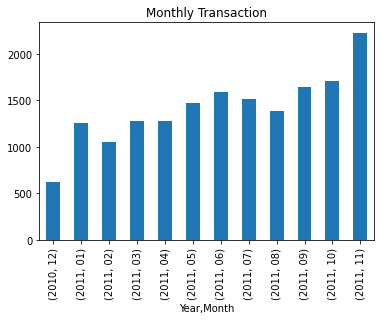

In [52]:
transUni = df.drop_duplicates(subset=['BasketID'])
monthly_trans=transUni.groupby(['Year','Month'])['BasketID'].count()
print('monthly transaction :\n',monthly_trans)
print()
monthly_trans.plot(kind='bar', title='Monthly Transaction')

Extracting the distribution of monthly deal sum.

monthly deal sum:
 Year  Month
2010  12       131181.976509
2011  01       279348.059881
      02       269872.330000
      03       308164.497001
      04       310989.701000
      05       351037.850000
      06       340129.955872
      07       349882.153747
      08       328796.600000
      09       459058.553000
      10       453914.393440
      11       558831.695655
Name: Amount, dtype: float64


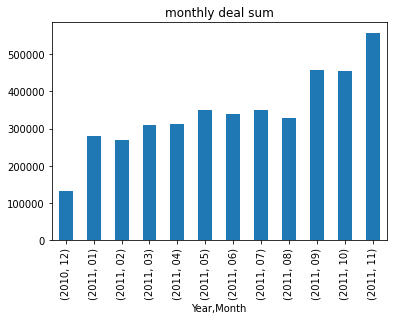

In [53]:
monthly_DealSum = df.groupby(['Year','Month'])['Amount'].sum()
print('monthly deal sum:\n',monthly_DealSum)
monthly_DealSum.plot(kind='bar', title='monthly deal sum')

Extracting monthly average deal sum.

In [54]:
avg_monthly_DealSum = round(monthly_DealSum.sum()/12,2)
print('Average of monthly deal sum:',avg_monthly_DealSum)

Average of monthly deal sum: 345100.65


Extracting the distribution of weekly Transactions.

In [55]:
# Generate new feature 'Weekday'.
df['Weekday'] = df.Date.dt.day_name()
print(df.head())
print()
print(df.tail())

      BasketID  Sale CustomerID  ProdID  ...  Year  Month Amount Weekday
25281   538365  1.65    17243.0   22469  ...  2010     12  13.20  Sunday
25282   538365  4.25    17243.0  84030E  ...  2010     12   4.25  Sunday
25283   538365  4.95    17243.0   22112  ...  2010     12  14.85  Sunday
25284   538365  4.65    17243.0   22835  ...  2010     12  23.25  Sunday
25285   538365  3.75    17243.0  84029E  ...  2010     12  15.00  Sunday

[5 rows x 11 columns]

       BasketID  Sale CustomerID ProdID  ...  Year  Month Amount Weekday
541889   581585  1.95    15804.0  22466  ...  2011     09   23.4  Monday
541890   581586  2.95    13113.0  22061  ...  2011     09   23.6  Monday
541891   581586  1.25    13113.0  23275  ...  2011     09   30.0  Monday
541892   581586  8.95    13113.0  21217  ...  2011     09  214.8  Monday
541893   581586  7.08    13113.0  20685  ...  2011     09   70.8  Monday

[5 rows x 11 columns]


weekly transaction:
 Weekday
Friday       2463
Monday       2574
Saturday      849
Sunday       2266
Thursday     3301
Tuesday      2899
Wednesday    2669
Name: BasketID, dtype: int64



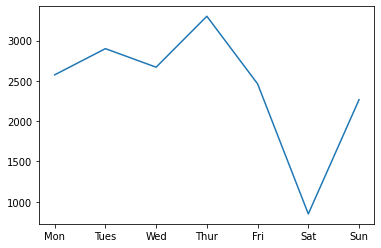

In [56]:
# Extracting the distribution of weekly Transactions.
UniRTrans = df.drop_duplicates(subset=['BasketID'])
weekly_trans=UniRTrans.groupby(['Weekday'])['BasketID'].count()
print('weekly transaction:\n',weekly_trans)
print()
weekday=['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
weektrans= [weekly_trans['Monday'], weekly_trans['Tuesday'], weekly_trans['Wednesday'],weekly_trans['Thursday'],weekly_trans['Friday'],weekly_trans['Saturday'],weekly_trans['Sunday']]
plt.plot(weekday, weektrans)
plt.show()

*Thursday reached the top number of transcation, and the Saturday  encountered the lowest number of deals which may refer to the fact that weekends are days off.*

Extracting the distribution of weekly deal sum.

Monthly deal sum:
 Weekday
Friday       592235.824956
Monday       613100.680521
Saturday     214413.360000
Sunday       578069.415964
Thursday     799567.442045
Tuesday      710509.410424
Wednesday    633311.632196
Name: Amount, dtype: float64



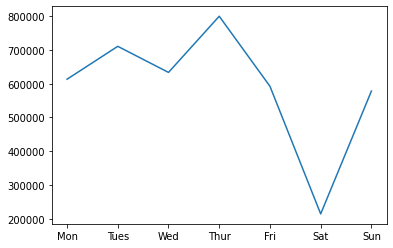

In [57]:
weekly_DealSum = df.groupby(['Weekday'])['Amount'].sum()
print('Monthly deal sum:\n', weekly_DealSum)
print()
weekday = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
weekly_DealSum = [weekly_DealSum['Monday'], weekly_DealSum['Tuesday'], weekly_DealSum['Wednesday'],weekly_DealSum['Thursday'],weekly_DealSum['Friday'],weekly_DealSum['Saturday'],weekly_DealSum['Sunday']]
plt.plot(weekday, weekly_DealSum)
plt.show()

Extracting the average weekly deal sum.

In [58]:
avg_weekly_DealSum = round(sum(weekly_DealSum)/52,2)
print('Average of weekly deal sum:',avg_weekly_DealSum)

Average of weekly deal sum: 79638.61


Extracting the deal sum per Customer.

In [59]:
total_DealSum = df.Amount.sum()
total_customer = df.CustomerID.nunique()
# Extracting the deal sum per Customer
DealSum_perCustomer = round(total_DealSum/total_customer,2)
print('Deal sum per customer = ',DealSum_perCustomer)

Deal sum per customer =  1104.32


Extracting the deal sum per Product.

In [60]:
total_Pro=df.Qta.sum()
# Extracting the deal sum per Product.
DealSum_perProduct = round(total_DealSum/total_Pro,2)
print('Deal sum per Product=',DealSum_perProduct)

Deal sum per Product= 1.84


Extracting the number of transactions per Customer.

In [61]:
total_Trans = df.BasketID.nunique()
trans_perCustomer = round(total_Trans/total_customer,2)
print('Transcations per customer=',trans_perCustomer)

Transcations per customer= 4.54


Extracting the Joint rate viz the number of items per each transcation.

In [62]:
rate= round(total_Pro/total_Trans, 1)
print ('The number of items per each transcation', rate)

The number of items per each transcation 132.3


*132 is a number lagrer than a common person or a family purchase in a single transaction，hence there must be some big buyer exists.*

Extracting the product that has been cancelled the most time.

In [63]:
returndf =df[df.BasketID.str.startswith('C')]
returnTrans= returndf.BasketID.nunique()
returnPron=abs(returndf.Qta.sum())
print('Return transcation:', returnTrans )
print ('Return products of numbers:',  returnPron)

Return transcation: 2579
Return products of numbers: 25902


In [64]:
Maxreturn= abs(returndf.groupby(['ProdID'])['Qta'].sum())
Maxreturn.sort_values()

ProdID
84819       1
23066       1
21456       1
85135C      1
85023C      1
         ... 
22960     163
21232     195
M         200
84949     207
22423     319
Name: Qta, Length: 1567, dtype: int64

In [65]:
df[(df['ProdID']=="22423")&(df['Qta']<0)].ProdDescr.unique()

array(['REGENCY CAKESTAND 3 TIER'], dtype=object)

* *ProductID : 22423,*
* *ProdDescr :  'REGENCY CAKESTAND 3 TIER',*
* *Number of products has been cancelled : 319.*

#### Extracting RFM features for describing the customer profile and his purchasing behavior.

Defines additional indicators leading to the
construction of a customer profile that can lead to an interesting analysis of customer segmentation.


In [66]:
Max_date = df.Date.max()
Cusdf = df[['CustomerID']].drop_duplicates()
Cusdf['LastDate'] = df.groupby('CustomerID')['Date'].transform('max')
Cusdf['FirstDate'] = df.groupby('CustomerID')['Date'].transform('min')
# Generate new feature 'Recency' - How recently did the customer purchases?
Cusdf['Recency'] = pd.Series(Max_date - Cusdf['LastDate']).dt.days
# Generate new feature 'First_Purchase' - How long has it been since the customer first purchases?
Cusdf['First_Purchase'] = pd.Series(Max_date - Cusdf['FirstDate']).dt.days
# Generate new feature 'Frequency' - How often do they purchase?
Unique_purchase = df.drop_duplicates(subset=['BasketID'])
Cusdf['Frequency'] = Unique_purchase.groupby('CustomerID').BasketID.transform('count')
# Generate new feature 'Monetary' - How much do they spend?
Cusdf['Monetary'] = df.groupby('CustomerID').Amount.transform('sum')

### Task 1.2.2 Explore the new features for a statistical analysis (distributions, outliers, visualizations, correlations).

#### Elimination of redundant variables
Elimination all discrete variables since the Euclidean metric will be used for clustering anlysis.

In [67]:
del Cusdf['CustomerID']
del Cusdf['LastDate']
del Cusdf['FirstDate']

#### Data semantics.

In [68]:
print(Cusdf.head())
print()
print(Cusdf.tail())

       Recency  First_Purchase  Frequency  Monetary
25281        5             353         29   7015.77
25301        5             353         26   4608.43
25308       20             353         15   3334.17
25351      353             353          1    141.04
25421      353             353          1    269.83

        Recency  First_Purchase  Frequency  Monetary
536876      110             110          1    105.60
536969      110             110          1    130.54
537255      110             110          1    320.70
538064      110             110          1     90.00
538812      110             110          1     90.04


In [69]:
Cusdf.dtypes

Recency             int64
First_Purchase      int64
Frequency           int64
Monetary          float64
dtype: object

* Recency : Time in days since the last purchase.
* First_Purchase : Time in days since the first purchase.
* Frequency : The shopping frequency, which is the total number of purchases made by the users in the year of analysis.
* Monetary : The total amount spent by the users within one year.

#### Distribution of the variables and statistics.

In [70]:
Cusdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 25281 to 538812
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Recency         3750 non-null   int64  
 1   First_Purchase  3750 non-null   int64  
 2   Frequency       3750 non-null   int64  
 3   Monetary        3750 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 146.5 KB


In [71]:
Cusdf.describe()

,Recency,First_Purchase,Frequency,Monetary
count,3750.000000,3750.000000,3750.000000,3750.000000
mean,89.028533,218.837600,4.538933,1104.322071
std,92.336394,105.397215,7.455707,2125.618585
min,0.000000,0.000000,1.000000,-419.460000
25%,15.000000,142.000000,1.000000,218.607500
50%,51.000000,244.000000,2.000000,501.340000
75%,143.000000,310.000000,5.000000,1210.710000
max,353.000000,353.000000,183.000000,42909.460000


* Recency : Continuous variable of type 'int64'.
* First_Purchase : Continuous variable of type 'int64'.
* Frequency : Continuous variable of type 'int64'.
* Monetary : Continuous variable of type 'float64'.

Text(0.5, 1.0, 'Monetary Histogram')

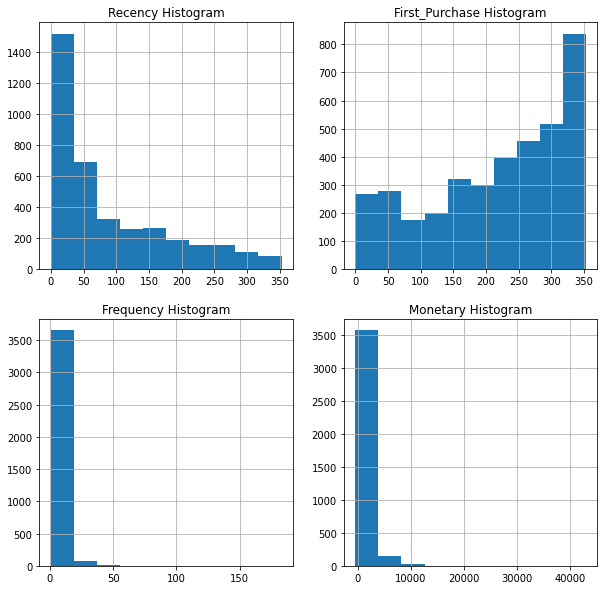

In [72]:
# Set up a grid of plots
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (2, 2)

# Plot Recency counts
plt.subplot2grid(fig_dims, (0, 0))
Cusdf['Recency'].hist()
plt.title('Recency Histogram')

# Plot First_Purchase counts
plt.subplot2grid(fig_dims, (0, 1))
Cusdf['First_Purchase'].hist()
plt.title('First_Purchase Histogram')

# Plot Frequency counts
plt.subplot2grid(fig_dims, (1, 0))
Cusdf['Frequency'].hist()
plt.title('Frequency Histogram')

# Plot Monetary counts
plt.subplot2grid(fig_dims, (1, 1))
Cusdf['Monetary'].hist()
plt.title('Monetary Histogram')

* Recency : right skewed.
* First_Purchase : left skewed.
* Frequency : right skewed.
* Monetary : right skewed.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

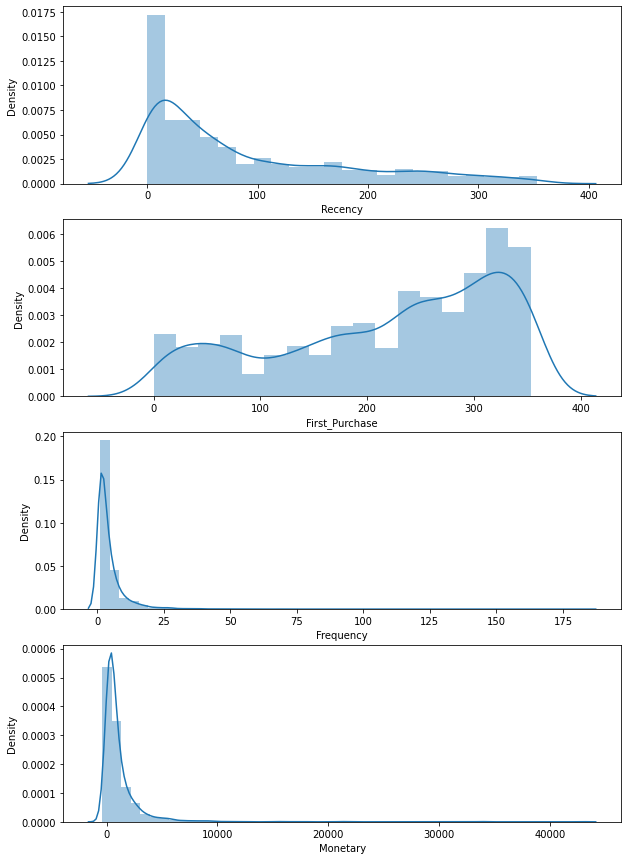

In [73]:
f,ax=plt.subplots(figsize=(10,15))
plt.subplot(4,1,1);sns.distplot(Cusdf.Recency,label='Recency')
plt.subplot(4,1,2);sns.distplot(Cusdf.First_Purchase,label='First_Purchase')
plt.subplot(4,1,3);sns.distplot(Cusdf.Frequency,label='Frequency')
plt.subplot(4,1,4);sns.distplot(Cusdf.Monetary,label='Monetary')
plt.show()

*Bar chart plot for 'Frequency' and 'Monetary' :*

(0.5, 1.0]       1214
(2.0, 5.0]        991
(1.0, 2.0]        690
(5.0, 10.0]       515
(10.0, 200.0]     340
Name: Frequency, dtype: int64



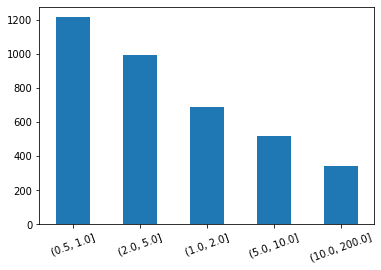

In [74]:
# Bin information
bins1=[0.5,1,2,5,10,200]
print(pd.cut(Cusdf['Frequency'],bins1).value_counts())
print()
pd.cut(Cusdf['Frequency'],bins1).value_counts().plot.bar(rot=20)

(100, 500]       1584
(1000, 5000]     1005
(500, 1000]       752
(0, 100]          250
(5000, 50000]     122
(-500, 0]          37
Name: Monetary, dtype: int64



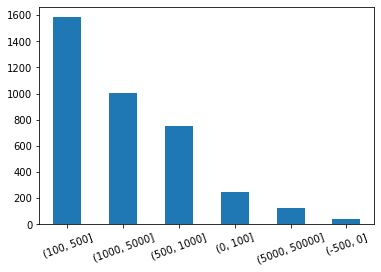

In [75]:
# Bin information
bins2=[-500,0,100,500,1000,5000,50000]
print(pd.cut(Cusdf.Monetary,bins2).value_counts())
print()
pd.cut(Cusdf.Monetary,bins2).value_counts().plot.bar(rot=20)

#### Handling outliers.

Removing mild Outliers in 'Recency'.

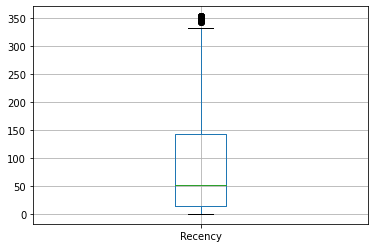

In [76]:
boxplot = Cusdf.boxplot(column=['Recency'])

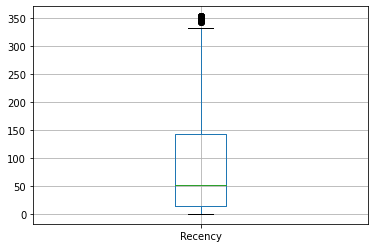

In [77]:
Q1 = Cusdf['Recency'].quantile(0.25)
Q3 = Cusdf['Recency'].quantile(0.75)
IQR = Q3 - Q1
Cusdf = Cusdf[((Cusdf.Recency > Q1 - 3*IQR))&(Cusdf.Recency < Q3 + 3*IQR)]
boxplot = Cusdf.boxplot(column=['Recency'])

Removing mild Outliers in 'First_Purchase'.

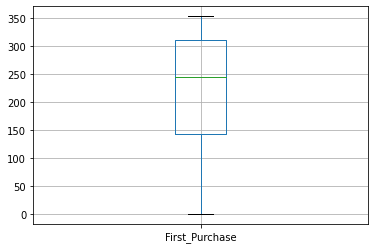

In [78]:
boxplot = Cusdf.boxplot(column=['First_Purchase'])

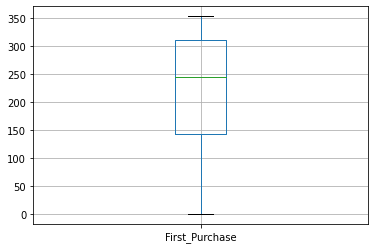

In [79]:
Q1 = Cusdf['First_Purchase'].quantile(0.25)
Q3 = Cusdf['First_Purchase'].quantile(0.75)
IQR = Q3 - Q1
Cusdf = Cusdf[((Cusdf.First_Purchase > Q1 - 3*IQR))&(Cusdf.First_Purchase < Q3 + 3*IQR)]
boxplot = Cusdf.boxplot(column=['First_Purchase'])

Removing mild Outliers in 'Frequency'.

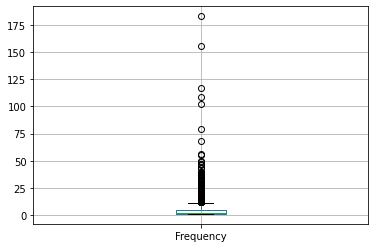

In [80]:
boxplot = Cusdf.boxplot(column=['Frequency'])

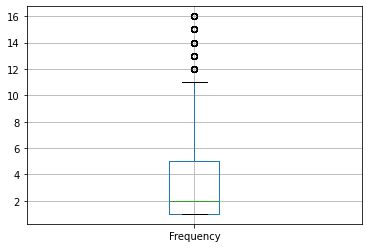

In [81]:
Q1 = Cusdf['Frequency'].quantile(0.25)
Q3 = Cusdf['Frequency'].quantile(0.75)
IQR = Q3 - Q1
Cusdf = Cusdf[((Cusdf.Frequency > Q1 - 3*IQR))&(Cusdf.Frequency < Q3 + 3*IQR)]
boxplot = Cusdf.boxplot(column=['Frequency'])

Removing mild Outliers in 'Monetary'.

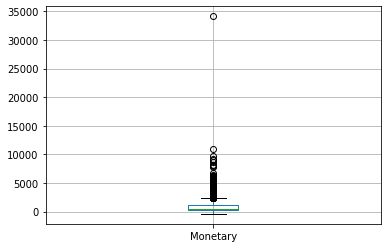

In [82]:
boxplot = Cusdf.boxplot(column=['Monetary'])

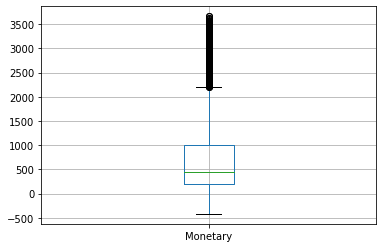

In [83]:
Q1 = Cusdf['Monetary'].quantile(0.25)
Q3 = Cusdf['Monetary'].quantile(0.75)
IQR = Q3 - Q1
Cusdf = Cusdf[((Cusdf.Monetary > Q1 - 3*IQR))&(Cusdf.Monetary < Q3 + 3*IQR)]
boxplot = Cusdf.boxplot(column=['Monetary'])

#### Visualizations.

Text(0.5, 1.0, 'Monetary Histogram')

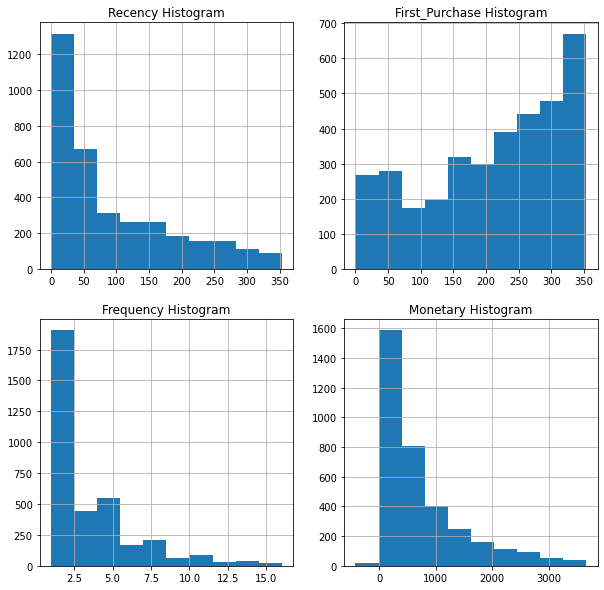

In [84]:
# Set up a grid of plots
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (2, 2)

# Plot Recency counts
plt.subplot2grid(fig_dims, (0, 0))
Cusdf['Recency'].hist()
plt.title('Recency Histogram')

# Plot First_Purchase counts
plt.subplot2grid(fig_dims, (0, 1))
Cusdf['First_Purchase'].hist()
plt.title('First_Purchase Histogram')

# Plot Frequency counts
plt.subplot2grid(fig_dims, (1, 0))
Cusdf['Frequency'].hist()
plt.title('Frequency Histogram')

# Plot Monetary counts
plt.subplot2grid(fig_dims, (1, 1))
Cusdf['Monetary'].hist()
plt.title('Monetary Histogram')

* Recency : right skewed.
* First_Purchase : left skewed.
* Frequency : right skewed.
* Monetary : right skewed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9db44c550>,
      dtype=object)

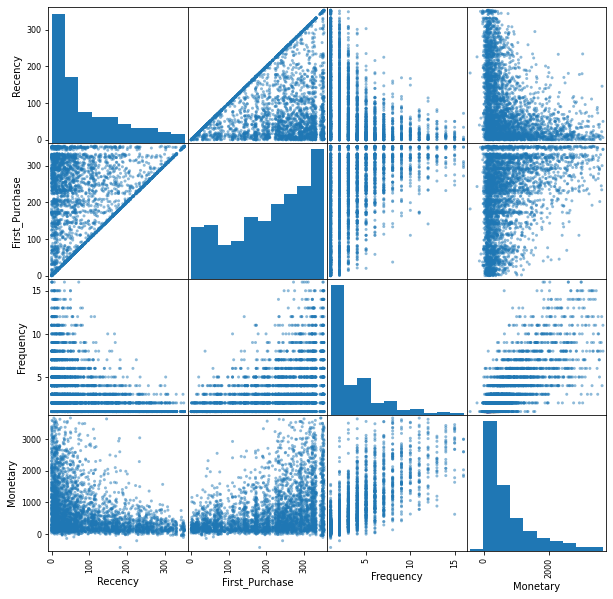

In [85]:
pd.plotting.scatter_matrix(Cusdf,figsize=(10,10))

Text(0, 0.5, 'Monetary')

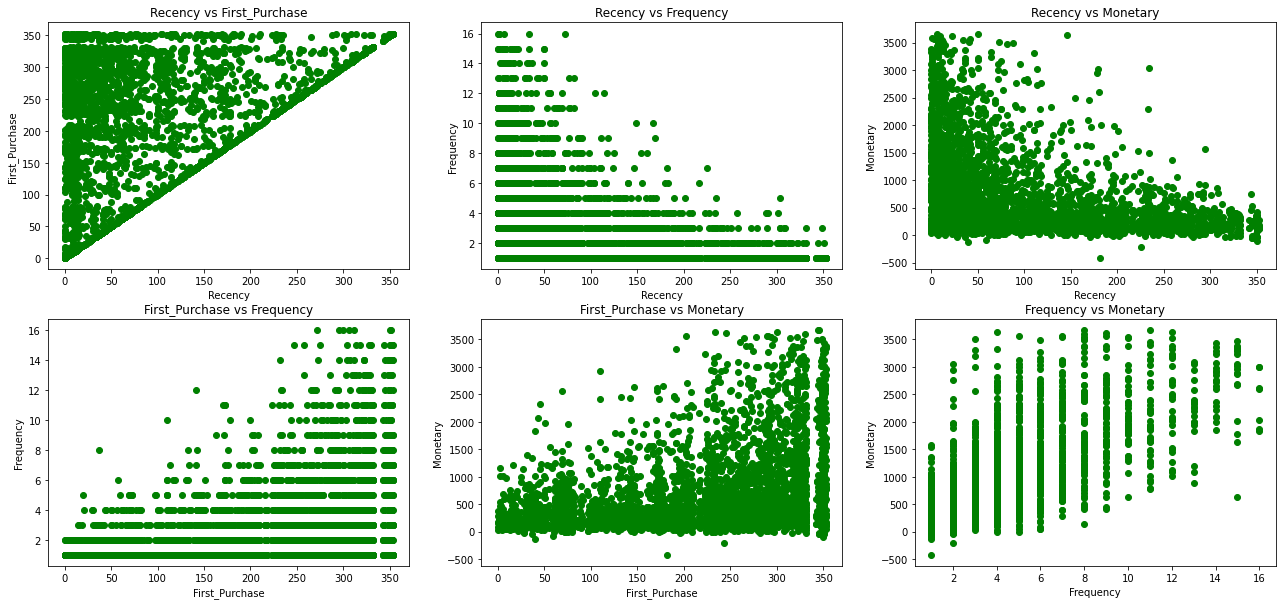

In [86]:
# Set up a grid of plots
fig = plt.figure(figsize=(22, 10)) 
fig_dims = (2, 3)

# Scatter plot for Recency vs First_Purchase
plt.subplot2grid(fig_dims, (0, 0))
plt.scatter(Cusdf['Recency'], Cusdf['First_Purchase'], color='g')
plt.title('Recency vs First_Purchase')
plt.xlabel('Recency')
plt.ylabel('First_Purchase')

# Scatter plot for Recency vs Frequency
plt.subplot2grid(fig_dims, (0, 1))
plt.scatter(Cusdf['Recency'], Cusdf['Frequency'], color='g')
plt.title('Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Scatter plot for Recency vs Monetary
plt.subplot2grid(fig_dims, (0, 2))
plt.scatter(Cusdf['Recency'], Cusdf['Monetary'], color='g')
plt.title('Recency vs Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')

# Scatter plot for First_Purchase vs Frequency
plt.subplot2grid(fig_dims, (1, 0))
plt.scatter(Cusdf['First_Purchase'], Cusdf['Frequency'], color='g')
plt.title('First_Purchase vs Frequency')
plt.xlabel('First_Purchase')
plt.ylabel('Frequency')

# Scatter plot for First_Purchase vs Monetary
plt.subplot2grid(fig_dims, (1, 1))
plt.scatter(Cusdf['First_Purchase'], Cusdf['Monetary'], color='g')
plt.title('First_Purchase vs Monetary')
plt.xlabel('First_Purchase')
plt.ylabel('Monetary')

# Scatter plot for Frequency vs Monetary
plt.subplot2grid(fig_dims, (1, 2))
plt.scatter(Cusdf['Frequency'], Cusdf['Monetary'], color='g')
plt.title('Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')

#### Pairwise Correlations.

In [87]:
Cusdf.corr()

,Recency,First_Purchase,Frequency,Monetary
Recency,1.000000,0.290883,-0.412231,-0.365273
First_Purchase,0.290883,1.000000,0.464804,0.377575
Frequency,-0.412231,0.464804,1.000000,0.765173
Monetary,-0.365273,0.377575,0.765173,1.000000


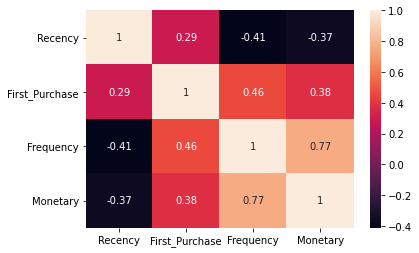

In [88]:
sns.heatmap(Cusdf.corr(), annot = True)

* Recency and First_Purchase is positive weak correlated.
* Recency and Frequency is negative weak correlated.
* Recency and Monetary is negative weak correlated.
* First_Purchase and Frequency is positive weak correlated.
* First_Purchase and Montary is positive weak correlated.
* Frequency and Monetary positive strong correlated.


refer to the **Rule of thumb: If the correlation > 0.8 then severe multicollinearity may be present.** we are not going to eliminate any variables as redundant.

In [89]:
Cusdf.to_csv(r'/content/drive/My Drive/DataMing/Cusdf.csv', header=True)